In [1]:
import sys; sys.path.append('..')
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyzx as zx
import os
import pickle
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def save_obj(obj, name):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('data/sim_anneal/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
def c_f(tup):
    return (tup[0]-tup[1]) + 10*tup[1]

def merge_sim(depth, qubits, tprob):
    obj = load_obj('sim_annealrd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    res = []
    res.append([obj['simulated_annealing_simp_i_0.5_a_0.9'],obj['simulated_annealing_simp_i_0.5_a_0.95'],obj['simulated_annealing_simp_i_0.5_a_0.99']])
    res.append([obj['simulated_annealing_simp_i_1_a_0.9'],obj['simulated_annealing_simp_i_1_a_0.95'],obj['simulated_annealing_simp_i_1_a_0.99']])
    res.append([obj['simulated_annealing_simp_i_2_a_0.9'],obj['simulated_annealing_simp_i_2_a_0.95'],obj['simulated_annealing_simp_i_2_a_0.99']])
    return res

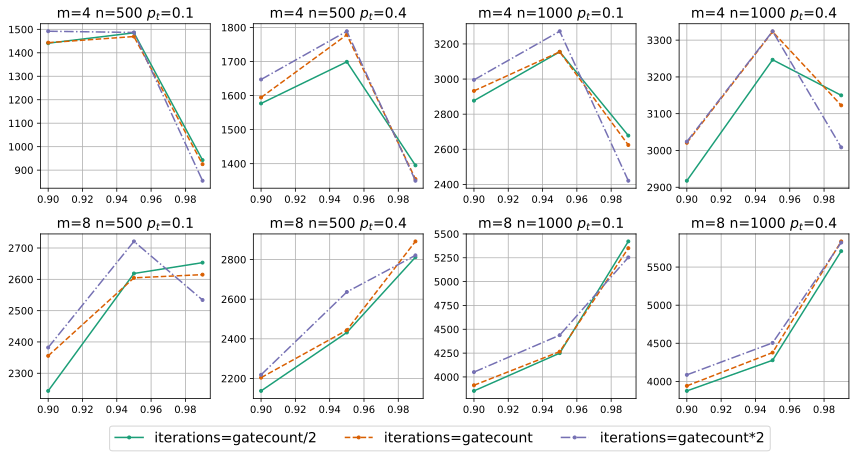

In [4]:
params = [[[500,4,1],[500,4,4],[1000,4,1],[1000,4,4]],[[500,8,1],[500,8,4],[1000,8,1],[1000,8,4]]]
names = ['iterations=gatecount/2','iterations=gatecount','iterations=gatecount*2']
xs = [0.9,0.95,0.99]
colors = ['#1b9e77', '#d95f02', '#7570b3']
styles = ['-','--','-.']
fig, axs = plt.subplots(len(params), len(params[0]), figsize=(12,6))

for i in range(0,len(params)):
    for j in range(0,len(params[i])):
        axs[i,j].set_title('m='+str(params[i][j][1])+' n='+str(params[i][j][0])+' $p_t$=0.'+str(params[i][j][2]),fontsize=14)
        yys = [[(cost[0]-cost[1]) + 10*cost[1] for cost in approach] for approach in merge_sim(params[i][j][0],params[i][j][1],params[i][j][2])]
        for k, ys in enumerate(yys):
            axs[i,j].plot(xs, ys, c=colors[k], marker="o",markersize=3, linestyle=styles[k], label=names[k] if i==0 and j == 0 else '')
        axs[i,j].grid()

plt.figlegend(bbox_to_anchor=(.13, 0), loc='upper left',
          ncol=3, borderaxespad=0,fontsize=14)
# plt.suptitle('Post-Optimization results for simulated annealing with varying temperature and cooling factor',fontsize=12)
plt.tight_layout()

plt.show()

In [3]:
load_obj('sim_anneal/sim_annealrd_500_q_4_t_0.1')

{'gatecount': (500.0, 141.2, 0.0),
 'basic_opt': (225.8, 95.6, 0.0277738094329834),
 'simulated_annealing_simp_i_0.5_a_0.9': (344.9, 121.8, 1.0425832748413086),
 'simulated_annealing_simp_i_0.5_a_0.95': (336.9, 127.6, 2.2524338483810427),
 'simulated_annealing_simp_i_0.5_a_0.99': (189.4, 83.7, 10.381220173835754),
 'simulated_annealing_simp_i_1_a_0.9': (350.7, 121.4, 1.145976686477661),
 'simulated_annealing_simp_i_1_a_0.95': (329.1, 126.7, 2.5651645183563234),
 'simulated_annealing_simp_i_1_a_0.99': (190.9, 81.6, 12.101396584510804),
 'simulated_annealing_simp_i_2_a_0.9': (351.7, 126.7, 1.2607950687408447),
 'simulated_annealing_simp_i_2_a_0.95': (324.0, 129.2, 2.8726163148880004),
 'simulated_annealing_simp_i_2_a_0.99': (177.0, 75.3, 13.333832859992981)}

In [7]:
load_obj('sim_annealrmanyitd_1000_q_4_t_0.1')

{'gatecount': (1000.0, 290.2, 0.0),
 'basic_opt': (474.5, 195.6, 0.07170064449310302),
 'simulated_annealing_simp_i_3_a_0.9': (729.3, 235.6, 2.6882972717285156),
 'simulated_annealing_simp_i_3_a_0.95': (729.7, 263.1, 6.061376023292541),
 'simulated_annealing_simp_i_3_a_0.99': (483.6, 206.4, 38.95962696075439),
 'simulated_annealing_simp_i_5_a_0.9': (731.0, 239.2, 2.724440407752991),
 'simulated_annealing_simp_i_5_a_0.95': (731.6, 266.0, 6.553124117851257),
 'simulated_annealing_simp_i_5_a_0.99': (454.9, 194.0, 42.98647825717926),
 'simulated_annealing_simp_i_10_a_0.9': (737.3, 238.1, 3.022388768196106),
 'simulated_annealing_simp_i_10_a_0.95': (743.8, 274.4, 7.03824303150177),
 'simulated_annealing_simp_i_10_a_0.99': (430.6, 186.8, 46.85276403427124)}

In [18]:
def c_f(tup):
    return (tup[0]-tup[1]) + 10*tup[1]

def merge_sim(depth, qubits, tprob):
    obj = load_obj('sim_annealrmanyitd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    res = []
    res.append([obj['simulated_annealing_simp_i_3_a_0.9'],obj['simulated_annealing_simp_i_3_a_0.95'],obj['simulated_annealing_simp_i_3_a_0.99']])
    res.append([obj['simulated_annealing_simp_i_5_a_0.9'],obj['simulated_annealing_simp_i_5_a_0.95'],obj['simulated_annealing_simp_i_5_a_0.99']])
    res.append([obj['simulated_annealing_simp_i_10_a_0.9'],obj['simulated_annealing_simp_i_10_a_0.95'],obj['simulated_annealing_simp_i_10_a_0.99']])
    return res

 2 1


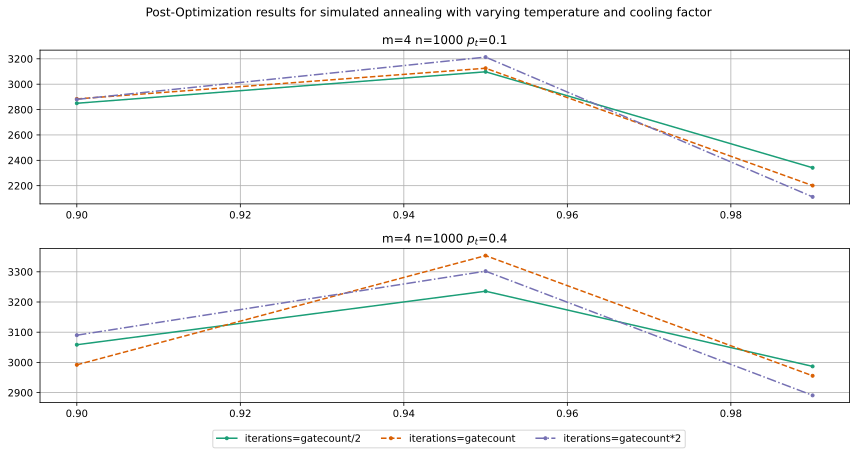

In [19]:
params = [[[1000,4,1]],[[1000,4,4]]]
names = ['iterations=gatecount/2','iterations=gatecount','iterations=gatecount*2']
xs = [0.9,0.95,0.99]
colors = ['#1b9e77', '#d95f02', '#7570b3']
styles = ['-','--','-.']
fig, axs = plt.subplots(len(params), len(params[0]), figsize=(12,6))
print("",len(params), len(params[0]))

for i in range(0,len(params)):
    for j in range(0,len(params[i])):
        axs[i].set_title('m='+str(params[i][j][1])+' n='+str(params[i][j][0])+' $p_t$=0.'+str(params[i][j][2]))
        yys = [[(cost[0]-cost[1]) + 10*cost[1] for cost in approach] for approach in merge_sim(params[i][j][0],params[i][j][1],params[i][j][2])]
        for k, ys in enumerate(yys):
            axs[i].plot(xs, ys, c=colors[k], marker="o",markersize=3, linestyle=styles[k], label=names[k] if i==0 and j == 0 else '')
        axs[i].grid()

plt.figlegend(bbox_to_anchor=(.25, 0), loc='upper left',
          ncol=3, borderaxespad=0)
plt.suptitle('Post-Optimization results for simulated annealing with varying temperature and cooling factor',fontsize=12)
plt.tight_layout()

plt.show()

In [14]:
fig.savefig(r'/home/korbinian/Documents/master/stau21/Dokumentation/Latex/Bilder/evaluation/anneal_compare.pdf',bbox_inches='tight')